In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Time Series Objects

In [23]:
# Reading Data as a series ( Assuming the file has an index and one column)
airseries = pd.read_csv('AirPassengers.csv')
airseries.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
airseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Creating Subset

In [25]:
airseries['Month']=pd.to_datetime(airseries['Month'])

In [26]:
airseries=airseries.set_index('Month')
airseries

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [27]:
airseries.loc['1952']

,#Passengers
Month,
1952-01-01,171
1952-02-01,180
1952-03-01,193
1952-04-01,181
1952-05-01,183
1952-06-01,218
1952-07-01,230
1952-08-01,242
1952-09-01,209


In [28]:
airseries['1953-06-01':'1954-04-01']

,#Passengers
Month,
1953-06-01,243
1953-07-01,264
1953-08-01,272
1953-09-01,237
1953-10-01,211
1953-11-01,180
1953-12-01,201
1954-01-01,204
1954-02-01,188


Text(0.5, 1.0, 'Details of the Passengers')

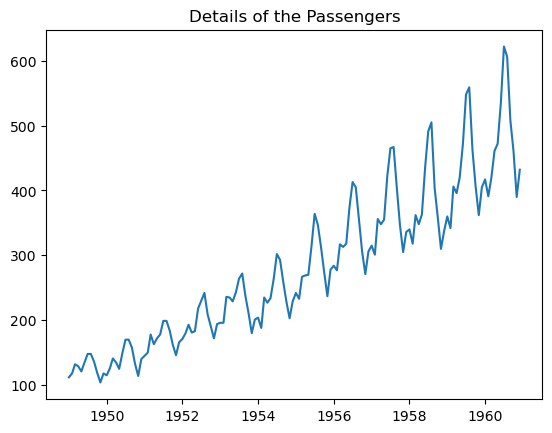

In [29]:
# displaying the time series of entire data
plt.plot(airseries)
plt.title("Details of the Passengers")

Text(0.5, 1.0, 'Details of the Passengers from 1951 till 1954')

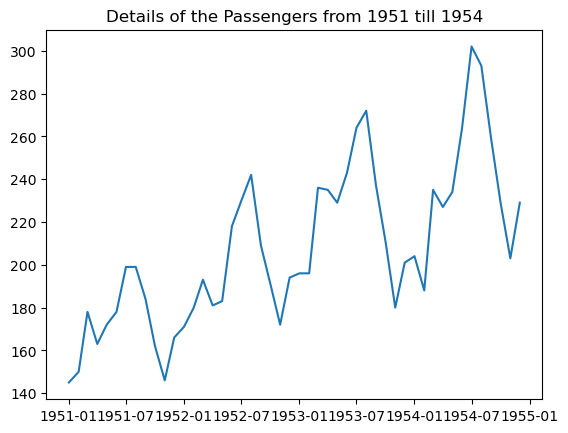

In [30]:
# Displaying series for specified range between 1951 and 1954
plt.plot(airseries['1951':'1954'])
plt.title("Details of the Passengers from 1951 till 1954")

## Determining Stationarity

A time series is considered to be stationary if it does not have trend or seasonal effects and thus has consistent statistical properties over time. These properties include mean variance and auto covariance. 

Before applying statistical modeling methods, the time series is required to be stationary. 

It is also important to check the staionarity of the series before doing forecasting. 

We can look at the graphs and apply Dickey Fuller Test. 

Null Hypothesis is the at the time series is nonstationary and has some timedependent structure. So if pvalue is less than 0.05 it means it is stationary

We will create a function to determine stationarity of the time series

The value of ADF Statistics is 0.815369
the p-value is :0.991880
Critical Values for different level of significance are:
	1%:-3.482
	5%:-2.884
	10%:-2.579


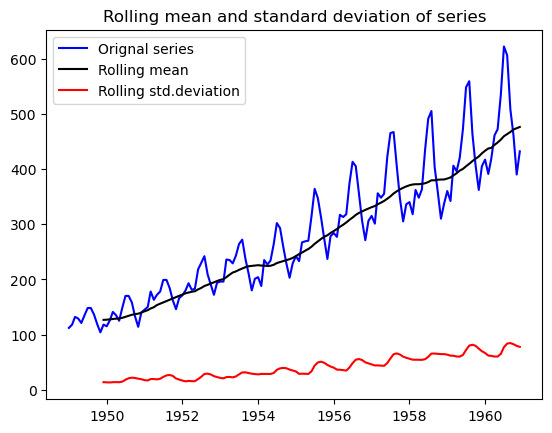

In [36]:
def time_func(series):
    # Applying Dickey--Fuller Test
    from statsmodels.tsa.stattools import adfuller
    airvalues = series.values
    
    #Null Hypothesis: The Time Series is Non stationary
    result = adfuller(airvalues)
    print('The value of ADF Statistics is %f' % result[0])
    print('the p-value is :%f' % result[1])
    print('Critical Values for different level of significance are:')
    for key, value in result[4].items():
        print('\t%s:%.3f' %(key,value))
              
    air_data=series.copy()        

              
    #Determining rolling statistics and standard deviation
    airrolmean = air_data['#Passengers'].rolling(12).mean()
    airrolstd = air_data['#Passengers'].rolling(12).std()
              
    #plot rolling statistics and standard deviation
    plt.figure()
    plt.plot(series,color='blue',label='Orignal series')
    plt.plot(airrolmean,color='black',label='Rolling mean')
    plt.plot(airrolstd,color='red',label='Rolling std.deviation')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation of series')
    plt.show()
              
# calling the function
time_func(airseries)

p value is greater than  0.05, means series is non_stationary. It can be seen from the graph that the mean is increasing even if the standard deviation is small. 

We need to make it stationary


### Making Time Series Stationary

There are two major factors that make a time series nonstationary: Trend(nonconstant mean) and seasonality( variation in specific time frames). We first take down trend and seasonality and after forecasting will apply again

#### Adjusting Trend using Smoothing
We smooth is by using Moving Average Method of exponential smoothing

##### Simple Moving Average
Here we use 12 period smoothing as the trend is one year. Also we will use logarithmic transformations because there is a strong positive trend

In [44]:
np.log(airseries)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


The First five records using moving average method are:
             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN


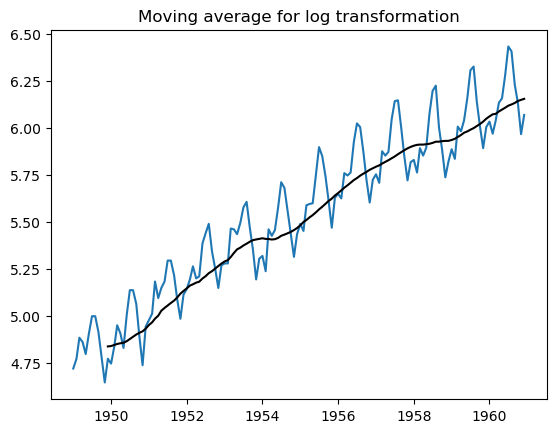

In [45]:
#performaing log transformation of the series
air_logseries = np.log(airseries)
air_logdata = air_logseries.copy()
#air_logdata = air_logdata['#Passengers']
moving_avg =  air_logdata.rolling(12).mean()

#Display the plot of logarithmic series
plt.figure()
plt.plot(air_logseries)
plt.plot(moving_avg,color='black')
plt.title("Moving average for log transformation")

# Subtracting the MA series from the original series
log_moving_avg_diff = air_logseries-moving_avg
print("The First five records using moving average method are:\n",log_moving_avg_diff.head(5))
log_moving_avg_diff.dropna(inplace=True)

We will now determine the stationarity of logarithmic series by calling the above defined function

The value of ADF Statistics is -3.162908
the p-value is :0.022235
Critical Values for different level of significance are:
	1%:-3.487
	5%:-2.886
	10%:-2.580


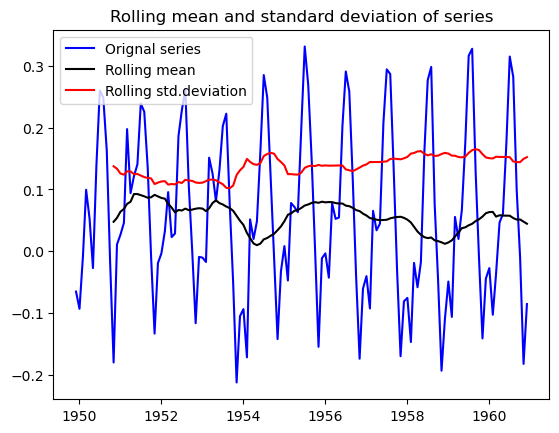

In [46]:
#Calling the function
time_func(log_moving_avg_diff)

The p-value shows that it is less than 0.05. This means that at 95% confidence interval, the series is stationary. We can see from the visual representation that the rolling values are varying slightly but there is no specific trend. Hence we can assume stationarity of the data.

### Exponential Weighted Moving Average

It is used when we want a weighted average of existing time series values to make a short-term prediction of future values.this can be computed using ewma() function from pandas library. 

These models witih seasonality of nondamped trend of both have two unit roots( i.e. they need two levels of differencing to make them stationary)

The first five records using weighted moving average method are:
             #Passengers
Month                  
1949-01-01     0.000000
1949-02-01     0.025339
1949-03-01     0.088967
1949-04-01     0.048028
1949-05-01    -0.012415


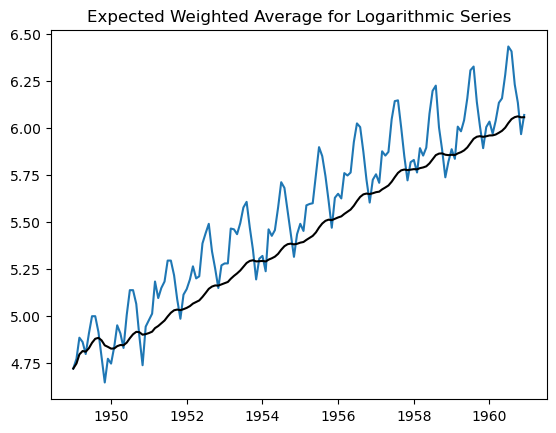

In [50]:
ewma = pd.Series.ewm
expweighted_avg = ewma(air_logdata,halflife=12).mean()

# Displaying the plot for exponential weighted moving averge
plt.figure()
plt.plot(air_logdata)
plt.plot(expweighted_avg,color='black')
plt.title("Expected Weighted Average for Logarithmic Series")

#Subtracting the expected moving average from the original series.
log_ewma_diff = air_logseries-expweighted_avg
print("The first five records using weighted moving average method are:\n",log_ewma_diff.head(5))

The Black line seems to be stationary. We can now check for stationarity of the series

The value of ADF Statistics is -3.601262
the p-value is :0.005737
Critical Values for different level of significance are:
	1%:-3.482
	5%:-2.884
	10%:-2.579


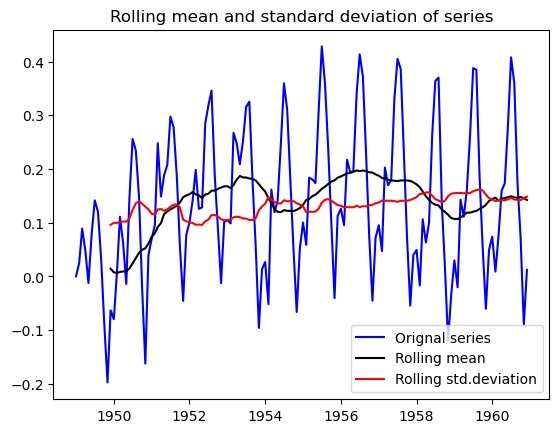

In [51]:
# calling the user defined function
time_func(log_ewma_diff)

Here p  value is less than 0.01, so the series is stationary

## Adjusting Seasonality and Trend

There are two common methods to remove trend and seasonality: differencing and seasonal decomposition

### Differencing 

This is done by taking difference using time lag of the series

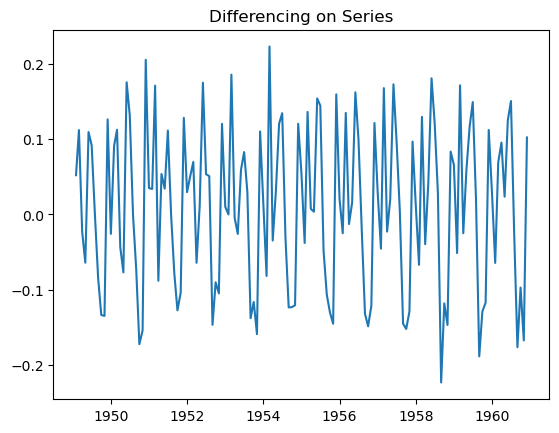

In [52]:
# differencing on series
air_log_diff = air_logdata-air_logdata.shift()

#Plotting the chart
plt.plot(air_log_diff)
plt.title("Differencing on Series")
air_log_diff.dropna(inplace=True)

The value of ADF Statistics is -2.717131
the p-value is :0.071121
Critical Values for different level of significance are:
	1%:-3.483
	5%:-2.884
	10%:-2.579


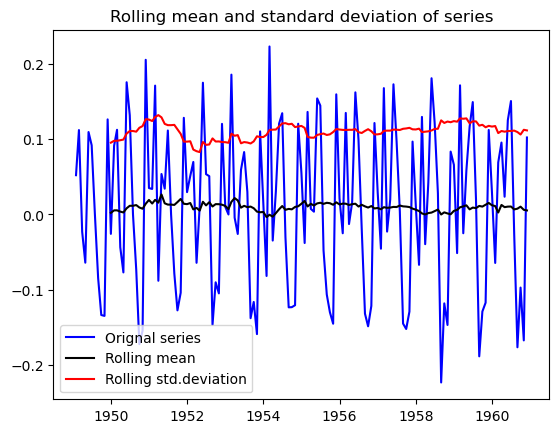

In [53]:
# checking the stationarity of series
time_func(air_log_diff)

the p-value if 0.07, we can infer that the time series is considered stationary at 10% level of significance.
However, we can consider second and third order differences for producing better results in specific applications

### Seasonal Decomposition

Time series data has the followiing components: Seasonal compnents, trend components and irregular component

In [55]:
# Applying seasonal decomposition for making series stationary.
from statsmodels.tsa.seasonal import seasonal_decompose
air_decomposition = seasonal_decompose(air_logdata)
air_trend = air_decomposition.trend
air_seasonal = air_decomposition.seasonal
air_residual = air_decomposition.resid

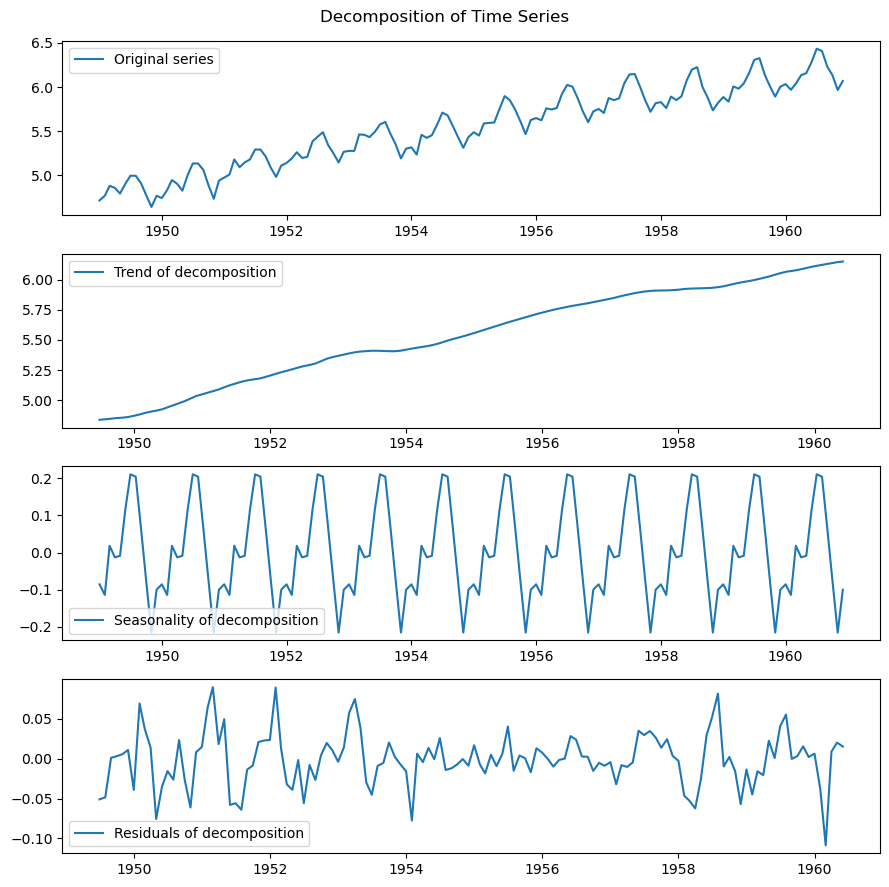

In [56]:
#Creating a plot
plt.figure(figsize=(9,9))
plt.suptitle("Decomposition of Time Series")
plt.subplot(411)
plt.plot(air_logdata,label='Original series')
plt.legend()
plt.subplot(412)
plt.plot(air_trend,label='Trend of decomposition')
plt.legend()
plt.subplot(413)
plt.plot(air_seasonal,label='Seasonality of decomposition')
plt.legend()
plt.subplot(414)
plt.plot(air_residual,label='Residuals of decomposition')
plt.legend()
plt.tight_layout()

In [83]:
#  Lets check the stationarity
# Handling missing values
air_logdata_decompose = air_residual
air_logdata_decompose.dropna(inplace=True)
air_logdata_decompose=air_logdata_decompose.to_frame()
air_logdata_decompose=air_logdata_decompose.rename({'resid':'#Passengers'},axis=1)

The value of ADF Statistics is -6.332387
the p-value is :0.000000
Critical Values for different level of significance are:
	1%:-3.485
	5%:-2.886
	10%:-2.580


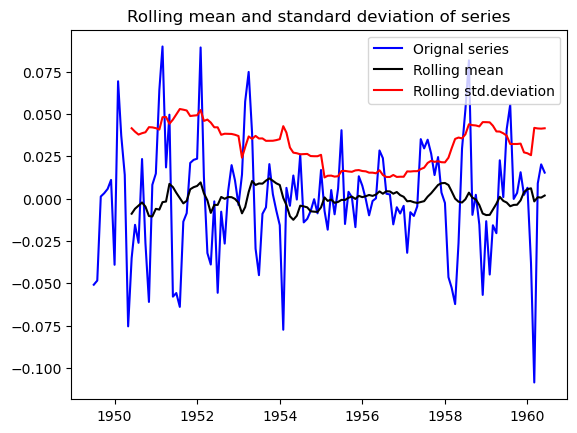

In [84]:
#Determining stationarity of series
time_func(air_logdata_decompose)

# ARIMA Modeling

a. The difference between ARIMA and ES  is that ES uses trends and seasonality whereas ARIMA models look at Autocorrelations in data

b. ARIMA is like a linear regression where the predictors depend upon some parameters of the ARIMA model

### Creating ARIMA Model

The ARIMA model can be created by using ARIMA() function from statsmodel package

Synteax
ARIMA (series,order=(a,d,m)
a. series is the series on which the ARIMA model will be used.

b. order has arguments that define the nature of the model:a. denotes the number of AR terms, eg. if a is 4, the predictors for y(t) will be y(t-1), y(t-2) y(t-3) and y(t-4)
d denotes the number of differences or number of non seasonal differences
m denotes the number of MA terms

for AR model: m = 0, for MA model a will be 0 and ARIMA the value of a and m will be zero

We use the RSS (Value of residuals) to evaluate the model, lesser the better